In [1]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from history_plot import plot_accuracy, plot_loss

In [2]:
BASE_DIR = os.getcwd()
LARGE_DATASET_DIR = os.path.join(BASE_DIR, 'large_dataset')
TRAIN_DIR = os.path.join(LARGE_DATASET_DIR, 'train')
TEST_DIR = os.path.join(LARGE_DATASET_DIR, 'test')

In [3]:
train_batch = ImageDataGenerator(rescale=1/255, validation_split=0.2).flow_from_directory(
    TRAIN_DIR, 
    color_mode='rgb', 
    batch_size=32,
    target_size=(256, 256),
    subset='training'
)

Found 5922 images belonging to 2 classes.


In [4]:
validation_batch = ImageDataGenerator(rescale=1/255, validation_split=0.2).flow_from_directory(
    TRAIN_DIR, 
    color_mode='rgb', 
    batch_size=32,
    target_size=(256, 256),
    subset='validation'
)

Found 1480 images belonging to 2 classes.


In [5]:
test_batch = ImageDataGenerator(rescale=1/255).flow_from_directory(
    TEST_DIR, 
    color_mode='rgb', 
    batch_size=32,
    target_size=(256, 256),
)

Found 602 images belonging to 2 classes.


In [6]:
vgg_19_base_model = VGG19(
    include_top=False,
    input_shape=(256, 256, 3),
    weights="imagenet",
    classes=1000,
    classifier_activation="softmax"
)

In [7]:
vgg_19_base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [8]:
vgg_19_base_model.trainable = False

In [9]:
model = Sequential()
model.add(vgg_19_base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 24,219,074
Trainable params: 4,194,690
Non-trainable params: 20,024,384
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(train_batch, validation_data=validation_batch, batch_size=32, epochs=15)

Epoch 1/15
186/186 [==============================] - 200s 947ms/step - loss: 0.1248 - accuracy: 0.9725 - val_loss: 0.0084 - val_accuracy: 0.9980
Epoch 2/15
186/186 [==============================] - 169s 909ms/step - loss: 8.7933e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 3/15
186/186 [==============================] - 167s 900ms/step - loss: 4.5104e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/15
186/186 [==============================] - 183s 983ms/step - loss: 2.3008e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/15
186/186 [==============================] - 177s 951ms/step - loss: 1.7140e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/15
186/186 [==============================] - 174s 938ms/step - loss: 1.3283e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/15
186/186 [==============================] - 181s 972ms/step - loss: 1.0363e-04 - accuracy: 1.0

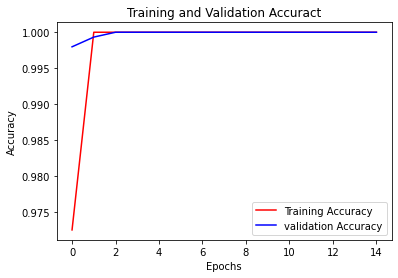

In [13]:
plot_accuracy(history)

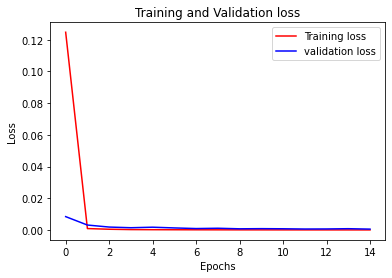

In [14]:
plot_loss(history)

In [16]:
predicted = model.evaluate(test_batch)

19/19 [==============================] - 24s 1s/step - loss: 0.0027 - accuracy: 1.0000


In [17]:
predicted

[0.0027168665546923876, 1.0]

In [18]:
model.save('004.h5')